# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
weather = pd.DataFrame({"Cities":cities})
weather

,Cities
0,bilibino
1,dhrangadhra
2,cape town
3,albany
4,kanniyakumari
...,...
625,kuusamo
626,rio de janeiro
627,north bend
628,tomigusuku


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind = []
city_num = 0
city_num_list = []
city_used = []
for city in weather['Cities']:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_used.append(city)
        city_num = city_num + 1
        print(city_num, city)
        city_num_list.append(city_num)
    except KeyError:
        print('city not found')

1 bilibino
2 dhrangadhra
3 cape town
4 albany
5 kanniyakumari
6 torbay
city not found
7 cap malheureux
city not found
8 namatanai
9 grindavik
10 stromness
11 ilulissat
12 pahrump
13 harer
14 bonavista
15 hobart
16 longyearbyen
17 jamestown
18 butaritari
19 barrow
20 rikitea
21 maragogi
22 straumen
23 tuatapere
24 te horo
25 port alfred
26 busselton
27 upernavik
28 bissau
29 mar del plata
30 roald
31 itaituba
32 qaanaaq
33 chapais
34 mataura
35 nosy varika
36 hilo
37 brae
38 ushuaia
39 salalah
40 rengo
41 lavrentiya
42 meulaboh
43 watsonville
44 saskylakh
45 dir
46 afua
city not found
47 bada
48 thinadhoo
city not found
49 tiksi
50 garhi khairo
city not found
51 atuona
52 kapaa
city not found
53 payson
54 nshamba
55 east london
56 zhanaozen
57 hovd
58 norman wells
59 vaini
60 khatanga
61 nioro
62 kuito
63 port lincoln
64 narsaq
65 pahalgam
66 airai
67 ongwediva
68 tuktoyaktuk
69 remedios
70 dikson
71 gobabis
72 nikolskoye
73 saldanha
74 namibe
75 port elizabeth
76 constitucion
77 hofn
7

572 rio gallegos
573 bunol
574 port macquarie
575 kuusamo
576 rio de janeiro
577 north bend
578 tomigusuku
579 rennes


In [5]:
weather_df = pd.DataFrame({'City':city_used, 'Latitude':lat, 'Longitude':lng, 'Temperature (F)':temp, 'Max Temperature (F)': max_temp,
                           'Humidity (%)':humidity, 'Cloudiness (%)':cloudiness, 'Wind Speed (MPH)':wind})
weather_df

,City,Latitude,Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,bilibino,68.05,166.44,26.31,26.31,95,69,4.12
1,dhrangadhra,22.98,71.47,87.30,87.30,37,0,11.41
2,cape town,-33.93,18.42,64.36,68.00,67,96,8.05
3,albany,42.60,-73.97,59.29,60.01,26,75,4.70
4,kanniyakumari,8.08,77.57,84.61,84.61,77,100,10.42
...,...,...,...,...,...,...,...,...
574,kuusamo,65.97,29.18,39.20,39.20,48,99,11.41
575,rio de janeiro,-22.90,-43.21,81.45,82.40,69,75,10.29
576,north bend,43.41,-124.22,51.85,53.01,93,90,6.93
577,tomigusuku,26.18,127.67,75.90,77.00,88,75,11.41


In [9]:
#output file
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
weather_df = pd.read_csv(output_data_file)

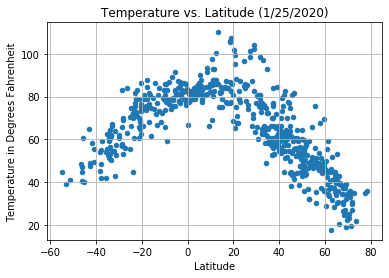

In [11]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Temperature (F)', marker = 'o')
plt.title('Temperature vs. Latitude (1/25/2020)')
plt.ylabel('Temperature in Degrees Fahrenheit')
plt.grid()

#### Latitude vs. Humidity Plot

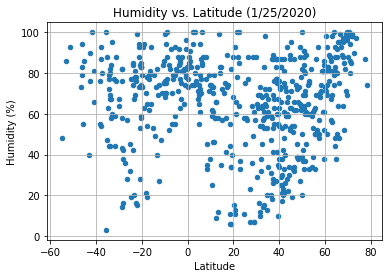

In [12]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity (%)', marker = 'o')
plt.title('Humidity vs. Latitude (1/25/2020)')
plt.ylabel('Humidity (%)')
plt.grid()

#### Latitude vs. Cloudiness Plot

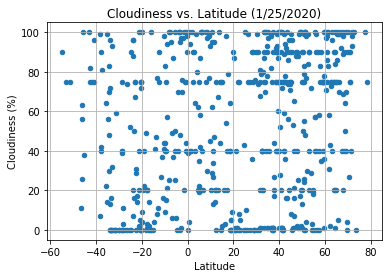

In [13]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness (%)', marker = 'o')
plt.title('Cloudiness vs. Latitude (1/25/2020)')
plt.ylabel('Cloudiness (%)')
plt.grid()

#### Latitude vs. Wind Speed Plot

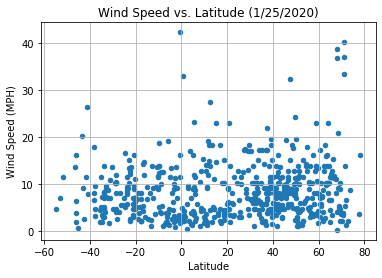

In [14]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed (MPH)', marker = 'o')
plt.title('Wind Speed vs. Latitude (1/25/2020)')
plt.ylabel('Wind Speed (MPH)')
plt.grid()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


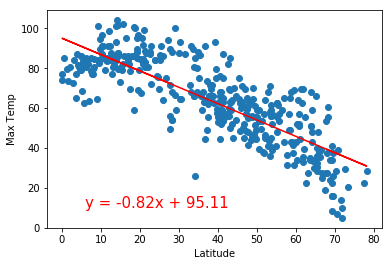

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


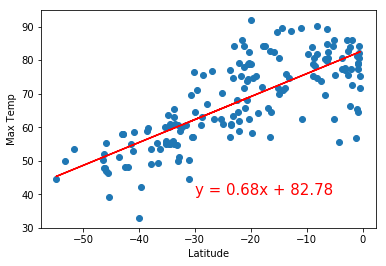

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


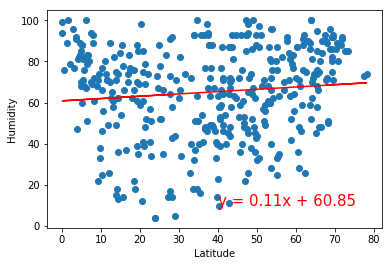

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


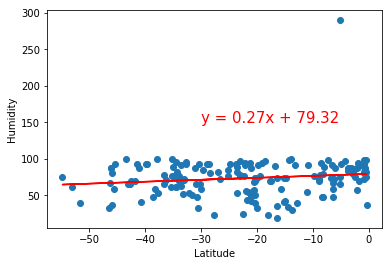

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


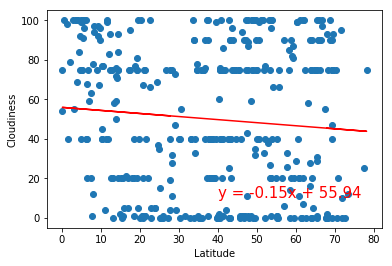

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


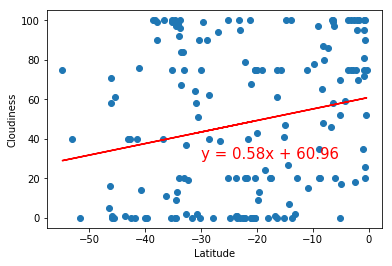

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


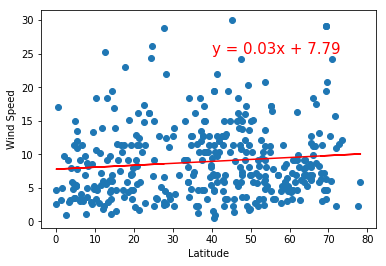

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


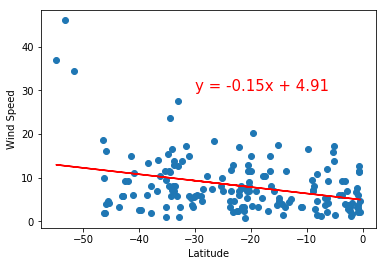